<a href="https://colab.research.google.com/github/yvrjsharma/Keras-edition-deux/blob/main/Keras_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Mathematical Building Blocks of Neural Networks

We will start with running the Keras image classification over MNIST data. This task is treated as the *Hello World* of CV domain.

This notebook is a summary / self-notes for Chapter 2 of [Keras book - Deep Learning With Python - by Francois Chollet, Edition Two](https://www.amazon.co.uk/Learning-Python-Second-Fran%C3%A7ois-Chollet/dp/1617296864/ref=asc_df_1617296864/?tag=googshopuk-21&linkCode=df0&hvadid=500841572122&hvpos=&hvnetw=g&hvrand=2730996652168945801&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1007850&hvtargid=pla-1214669039719&psc=1&th=1&psc=1). This notebook borrows heavily from the chapter. Diagram is borrowed from the book but have been reproduced by me.

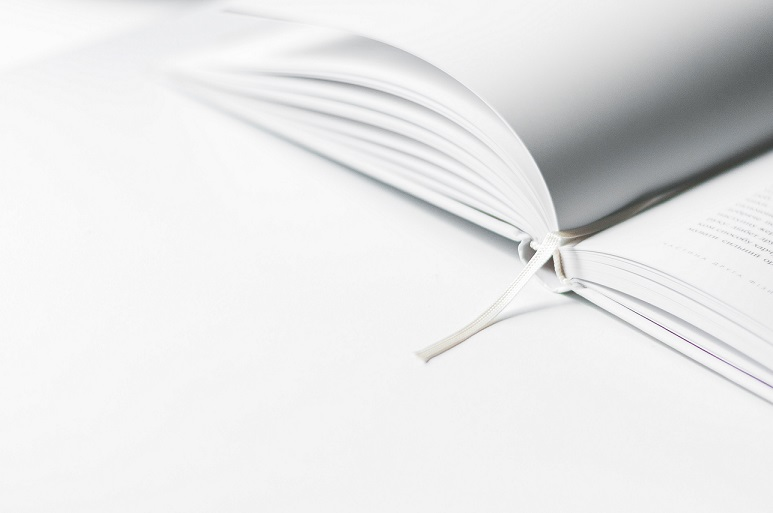

In [ ]:
#Importing MNIST dataset
from tensorflow.keras.datasets import mnist


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
#60k images which 28 by 28 pixels
train_images.shape 

(60000, 28, 28)

In [ ]:
train_labels.shape,train_labels

((60000,), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Building the Keras network -

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

To make the network ready for training, we need three things to happen -
1. A Loss function - Network will use this to measure its performance on training data, and thus to steer itself in the right direction.
2. An Optimizer - A function or mechanism through which network will update itself based on the training data and loss function.
3. Metrics - To monitor during training and testing. For example, accuracy or the fraction of images correctly classified.


In [ ]:
#Compilation step
network.compile(loss="sparse_categorical_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])

In [ ]:
#preparing the image data - convert to float
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

In [ ]:
#Encoding categorical variables in target
from tensorflow import keras

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#Training
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2549 - accuracy: 0.9266
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0496 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0375 - accuracy: 0.9882


The network has now learned to associate images with labels. Specifically, the network layers have extracted representation out of the data fed into them. The final layer of Softmax will return an array of 10 probability scores summing upto 1 for every image in the test set.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
test_loss, test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0653 - accuracy: 0.9795


(0.0652981847524643, 0.9794999957084656)

What are tensors?

They are multi dimensional Numpy arrays used to store data. They are the building blocks of deep learning networks. A matrix, for example, is a 2D tensor. So tensors can be defined as a generalization of matrices to an arbitrary number of dimensions. Also keep in mind that for tensors, a dimension is often referred to as an axis.

Vectors are nothing but 1D Tensors or just an array of numbers.

Matrices are nothing but 2D Tensors. So they have two axes (rows, columns).

3D Tensos means packing the 2D matrices in another array. Similarly, if you pack this 3D Tensor into another array, you will get a 4D Tensor. Example of a 4D tensor would be an RGB image, a 5D tensor would be a video. A batch of 128 grayscale images with 256\*256 size could be stored in a Tensor of (128,256,256,1) shape, while if it would have been RGB images, the tensor would look like (128,256,256,3). For a video with 60 seconds of length, sampled at 4 frames per second, with size 144\*256, and is RGB, the Tensor would be (240,144,256,3) and if there are 4 such sample clips - would be stored in a (4,240,144,256,3) or a 5D Tensor.

Shape is nothing but how many dimensions are there along each axis.

Lets also keep in mind that Deep Learning models don't process an entire dataset at once; rather, they break the data into small batches. 

In [ ]:
#understanding dimension, shape and datatype of tensors
import numpy as np
a= np.array(12)
b= np.array([1,2,3,4,5,6.,7,8,9])
c= np.array([[1,2,3],[4,5,6], [7,8,9]])
d= np.array([[[1.,2,3,11,999],[4,5,6,11,999], [7,8,9,11,999], [9,9,9,9,999]],
             [[1,2,3,11,999],[4,5,6,11,999], [7,8,9,11,999], [9,9,9,9,999]],
             [[1,2,3,11,999],[4,5,6,11,999], [7,8,9,11,999], [9,9,9,9,999]]])

a.ndim, a.shape, a.dtype, a

(0, (), dtype('int64'), array(12))

In [ ]:
b.ndim, b.shape,b.dtype, b

(1, (9,), dtype('float64'), array([1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
c.ndim, c.shape, c

(2, (3, 3), array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]))

In [ ]:
d.ndim, d.shape,d.dtype, d

(3, (3, 4, 5), dtype('float64'), array([[[  1.,   2.,   3.,  11., 999.],
         [  4.,   5.,   6.,  11., 999.],
         [  7.,   8.,   9.,  11., 999.],
         [  9.,   9.,   9.,   9., 999.]],
 
        [[  1.,   2.,   3.,  11., 999.],
         [  4.,   5.,   6.,  11., 999.],
         [  7.,   8.,   9.,  11., 999.],
         [  9.,   9.,   9.,   9., 999.]],
 
        [[  1.,   2.,   3.,  11., 999.],
         [  4.,   5.,   6.,  11., 999.],
         [  7.,   8.,   9.,  11., 999.],
         [  9.,   9.,   9.,   9., 999.]]]))

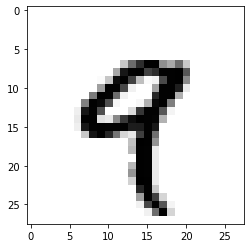

In [ ]:
#Tensor slicing, and reshaping
digit = train_images[4].reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

All transformations learned by deep neural networks can be reduced to a handful of Tensor Operations applied to numeric data, example - additions, multiplying *etc.*

Numpy helps in doing element-wise algebraic operations blazingly fast. Numpy uses BLAS or Basic Linear ALgebra Subprograms to do all the heavy lifting in the background. BLAS does highly parallel and efficient tensor manipulation and is implemented in low level languages like C or Fortran.

In [ ]:
#Using Broadcasting
import numpy as np
x = np.random.random((32,10))
y = np.random.random((10,))

In [ ]:
y.reshape(1,10)

array([[0.09979756, 0.27266125, 0.00264611, 0.31907324, 0.6493532 ,
        0.53942681, 0.623675  , 0.26818283, 0.90303607, 0.39663418]])

In [ ]:
#broadcasting examples
x+y

In [ ]:
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))

In [ ]:
z =  np.maximum(x,y)
z

In [ ]:
#transpose example
x = np.zeros((300,100))
y = np.transpose(x)
x.shape, y.shape

((300, 100), (100, 300))

In an example neural network, consider that our first layer transforms the input data as follows -

```output = relu(dot(w,input) + b)```

W and B are Tensors, they are attributes of layers and are called weights or trainable parameters. They contain the information learned by the network by exposure to training data.

During training, these weights are gradually adjusted based on a feedback signal. All the operations in a network are differentiable, so we take gradient of the *Loss* with respect to the coefficients of the network. We then move the value of the coefficients in the direction where the loss decreases. The *loss function* is a differentiable function, and thus you can compute the *gradient* of loss function. Moving the coefficient values or weights in the opposite direction of the gradient, you decrease the loss little by little every time.

In order to train your network -
1. Draw a batch of training samples, x, and corresponding targets, y_true.
2. Run the model on x to obtain predictions, y_pred (this is called the forward pass).
3. Compute the loss of the model on the batch, a measure of the mismatch
between y_pred and y_true.
4. Compute the gradient of the loss with regard to the model’s parameters (this is called the backward pass).
5. Move the parameters a little in the opposite direction from the gradient—for
example, W -= learning_rate * gradient—thus reducing the loss on the batch
a bit. The learning rate (learning_rate here) would be a scalar factor modulating the “speed” of the gradient descent process.

This whole process is called ***mini batch stochastic gradient descent***.
If you run this process on an individual sample, then it would be called *true SGD*, and opposite would be to run this process for all data at once, in which case each updates will be more accurate but far more expensive, and will be called *batch gradient descent*


There are multiple ways to update weights using stochastic gradient descent. Some take previous weight updates when computing the next weight update, rather than just looking at the current value of gradients. For example, SGD with momentum, Adagrad, RMSProp, and several others. These variants are called ***Optimizers*** or *optimization methods*.

**Momentum** addresses two issues with SGD - Convergence Speed and Local minima. If the parameters are just optimized using SGD with a small Learning Rate, the descent might get stuck into a local minima of the loss function. To avoid this from happening, a descent method which takes into account not only the slope value at a point (the gradient), but also the *velocity* with which the gradient is moving down till now. Simply putting, **updating the parameter values w not just based on the current gradient value but also on the previous parameter update**.

Lets move back to the intial neural network that we used to predict digit in MNIST example. The loss functon and value can be defined as follows -

``` loss_value = loss(y_true, softmax(dot(relu(dot(inputs, w1) + b1), w2) +b2)) ```

**Backpropagation** is a way to use the derivatives of simple operations (such as additions, dot products, relus *etc.*) to easily compute the gradient of arbitrarily complex combinations of these atomic operations like one shown above. 

For example consider this composite function and oserve how we can take gradient of this complex composite function using what is called the **Chain Rule** -

```
def fghj(x):
  x1= j(x)
  x2=h(x1)
  x3=g(x2)
  y=f(x3)
  return y
```

Now if we have to take gradient of y wrt x, the chain rule would imply it would look something like this -

```
 grad(y,x) = (grad(y,x3) * grad(x3,x2) * grad(x2,x1) * grad(x1,x))
```

In TensorFlow, backpropagation is implemented using *Computation Graphs*. It is a directed acyclic graph of Tensor Operations. You can also say that Backpropagation is actually just the application of the chain rule to a computation graph.

Modern Frameworks like Tensorflow, JAX and Pytorch are capable of Automatic Differentiation. AutoDiff is implemented using the computation graphs. AutoDiff makes it possible to retrieve the gradients of arbitrary compositions of differentiable tensor operations without doing any extra work except writing down the forward pass. This is incredibly empowering and time saving if you think about it. 

The API through which TensorFlow implement AutooDiff is called the **GradientTape**.

Let's revise a bit what happens inside a neural network while training -


* The model consists of data transformation layers (eg. Relu transformation, dot product, addition *etc.*) that are chained together. Models map input data to predictions. 
* The Loss function then compares the predictions to the actual targets and produces the Loss value as a measure of comparison. This Loss value becomes a measure of how well the model's predictions match what was expected.
* The Optimizer uses this Loss vallule to update the model weights or coefficients or parameters. These weights or *weight tensors* are where knowledge learned by models persists.

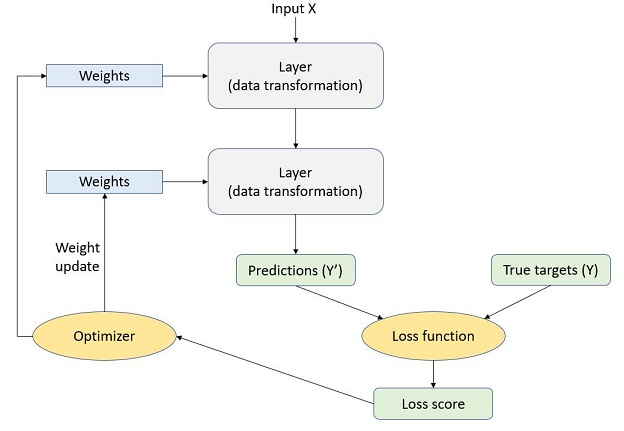

-------------
Implementing the MNIST classification model in Tensorflow instead of Keras now -



In [ ]:
#A class to implement the layers in this network - RELU dense and softmax dense
#This class will create two variables W and b
#__call__() method applies to preceding transformation (a forward pass)
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        #Creating weight matrix with shape (input_size, output_size)
        #Initializing the weights with random values
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)
    
        #dOING THE sAME FOR BIAS 
        #creating a vector of output size
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
    
    #This will do the forward pass
    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    #method for retrieveing weights of layers
    @property
    def weights(self):
        return [self.W, self.b]

In [ ]:
#Defining a class that will chain together the NN layers
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

  #Forward pass
  #The class exposes a __call__() method to call the
  # created layers on inputs provided 
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
#Creating a dummy Keras model using these two classes
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [ ]:
#creating a batch generator 
#A way to iterate over MNIST in mini batches

import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [ ]:
#Running one training step or Per-batch training step

def one_training_step(model, images_batch, labels_batch):
  #Forward pass (Computing model predictions)
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        #compute loss value for a batch given actual labels
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    #compute gradients wrto the model weights
    gradients = tape.gradient(average_loss, model.weights)
    #Updating the weights using these gradients calulated using update_weights() function
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

In [ ]:
#Full Training Loop
#Running per batch to full epoch or on full training data
#And then running epoch N number of times
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
#Fitting the model created using tensorflow over training data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 3.34
loss at batch 100: 2.24
loss at batch 200: 2.22
loss at batch 300: 2.09
loss at batch 400: 2.24
Epoch 1
loss at batch 0: 1.90
loss at batch 100: 1.90
loss at batch 200: 1.86
loss at batch 300: 1.73
loss at batch 400: 1.86
Epoch 2
loss at batch 0: 1.59
loss at batch 100: 1.61
loss at batch 200: 1.53
loss at batch 300: 1.45
loss at batch 400: 1.54
Epoch 3
loss at batch 0: 1.34
loss at batch 100: 1.37
loss at batch 200: 1.27
loss at batch 300: 1.23
loss at batch 400: 1.30
Epoch 4
loss at batch 0: 1.14
loss at batch 100: 1.19
loss at batch 200: 1.07
loss at batch 300: 1.07
loss at batch 400: 1.13
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.05
loss at batch 200: 0.93
loss at batch 300: 0.95
loss at batch 400: 1.01
Epoch 6
loss at batch 0: 0.88
loss at batch 100: 0.94
loss at batch 200: 0.82
loss at batch 300: 0.86
loss at batch 400: 0.92
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.85
loss at batch 200: 0.74
loss at batch 300: 0.79
loss at batch 40

In [ ]:
#Evaluating the model
import numpy as np
predictions = model(test_images)
#Converting to numpy tensors
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"Accuracy : {matches.mean():.2f}")

Accuracy : 0.81


* This notebook helped in developing understanding about Tensors.

* Automatic differentiation enables backpropagation in neural networks. Chain rule of gradient helps in calculating gradients of constituting complex tensor operations with respect to the network coefficients.

* Network weights or the Parameters persist the knowledge learned by a model from a training set.

* Model learns by finding a set of values of its weights such that a loss function is minimized. This loss function represents a measure of success for the task you are trying to solve.

* Optimizer specifies the exact way in which the gradient of the loss is used to update the network weights or parameters. It can be RMSprop, SGD with momentum, etc.  

* We saw how Keras makes it extremely easy to build, train and evaluate a model

* Tensorflow implementation gave us a low-level mental breakdown of what is happening behind the scenes of a high-level **KERAS API**.